In [1]:
from keras.datasets import imdb

#Cargamos los datos de imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [17]:
#Así se podría decodificar una reseña de imdb de vuelta a texto

word_index = imdb.get_word_index() #Obtiene un diccionario para mapear cada palabra a un índice numérico único
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i- 3, '?') for i in train_data[0]])

print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [3]:
import numpy as np

#Codificación one-hot: vector de tamaño 10.000 donde los indices de las palabras de la reseña se establecen en 1 y el resto en 0

def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
     results[i, sequence] = 1.
 return results
 
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
from keras import models
from keras import layers

#Input: texto vectorizado -> Capa de 16 unidades (relu) -> Capa de 16 unidades (relu) -> Capa de 1 unidad (sigmoide) -> Output: provabilidad [0-1]

model = models.Sequential()
#model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Input(shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.6478 - loss: 0.6542 - val_acc: 0.8453 - val_loss: 0.4819
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.8728 - loss: 0.4277 - val_acc: 0.8759 - val_loss: 0.3601
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9047 - loss: 0.3064 - val_acc: 0.8823 - val_loss: 0.3126
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9269 - loss: 0.2370 - val_acc: 0.8790 - val_loss: 0.2988
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9303 - loss: 0.2057 - val_acc: 0.8897 - val_loss: 0.2768
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9468 - loss: 0.1688 - val_acc: 0.8871 - val_loss: 0.2764
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9541 - loss: 0.1461 - val_acc: 0.8856 - val_loss: 0.2814
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9652 - loss: 0.1242 - val_acc: 0.8840 - val_loss: 0.3007
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9657 - loss:

In [9]:
#Validación K-fold
import numpy as np

k=4
num_val_samples = len(train_data) // k
num_epochs = 20
all_scores = []

for i in range(k):
    print(f'Procesando fold #{i}')
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [x_train[:i * num_val_samples],
        x_train[(i + 1) * num_val_samples:]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
        y_train[(i + 1) * num_val_samples:]],
        axis=0
    )

    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets)
    all_scores.append(val_mae)

Procesando fold #0
Epoch 1/20
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - acc: 0.9458 - loss: 0.2059
Epoch 2/20
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - acc: 0.9433 - loss: 0.2168
Epoch 3/20
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - acc: 0.9473 - loss: 0.2393
Epoch 4/20
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - acc: 0.9542 - loss: 0.2334
Epoch 5/20
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - acc: 0.9545 - loss: 0.2360
Epoch 6/20
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - acc: 0.9599 - loss: 0.2241
Epoch 7/20
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - acc: 0.9588 - loss: 0.2267
Epoch 8/20
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - acc: 0.9676 - loss: 0.1927
Epoch 9/20
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - acc: 0.9714 - loss: 0.1878
Epoch 10/20
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - acc: 0.9711 - loss: 0.1808
Epoch 11/20
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - acc: 0.9735 - loss: 0.1539
Epoch 12/20
18750/18750 ━━━━━━━━━

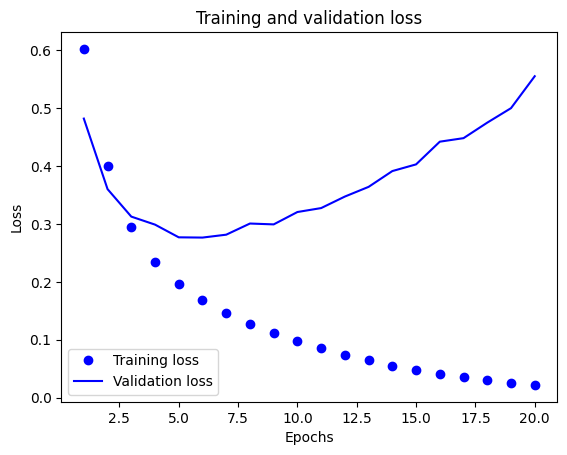

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

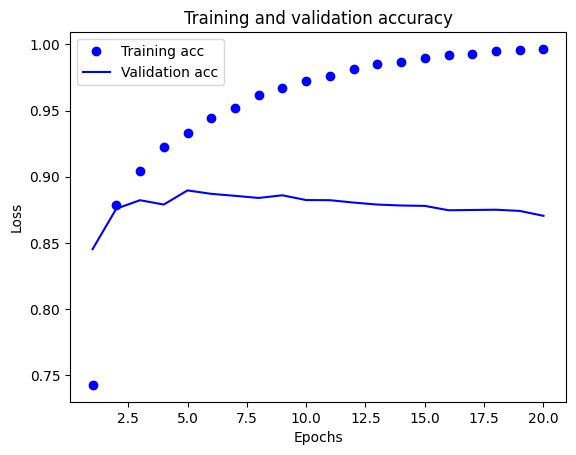

In [11]:
 plt.clf()
 acc_values = history_dict['acc']
 val_acc_values = history_dict['val_acc']

 plt.plot(epochs, acc_values, 'bo', label='Training acc')
 plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
 plt.title('Training and validation accuracy')
 plt.xlabel('Epochs')
 plt.ylabel('Loss')
 plt.legend()
 plt.show()

In [12]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step 


array([[6.1241141e-09],
       [1.0000000e+00],
       [1.0000000e+00],
       ...,
       [1.6693768e-13],
       [5.5540852e-25],
       [1.0000000e+00]], dtype=float32)

In [18]:
def text_to_sequence(text):
    word_index = imdb.get_word_index() #Obtiene un diccionario para mapear cada palabra a un índice numérico único
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    words = text.lower().split()

    #Creamos un vector de tamaño 10,000 y asignamos 1s en las posiciones de los índices de las palabras
    vector = np.zeros(10000)
    for word in words:
        index = word_index.get(word, None)
        if index is not None and index < 10000:  # Asegurarse de que el índice esté dentro del rango permitido
            vector[index] = 1.0
        
    return vector


text_review = input("Escribe una reseña: ")
input_vector = text_to_sequence(text_review)

print(input_vector)

prediction = model.predict(np.array([input_vector]))
print(f"Reseña {"positiva" if prediction[0] > 0.5 else "negativa"}: {prediction[0]}")


Escribe una reseña:  this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have

[0. 1. 1. ... 0. 0. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Reseña negativa: [1.5255548e-33]
